## DATASET과 DATALOADER
PyTorch는 아래 두 속성을 통해 데이터를 쉽게 사용할 수 있도록 한다
1. torch.utils.data.DataLoader
2. torch.utils.data.Dataset

In [1]:
%pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 데이터 불러오기

import torch
from torch.utils.data import Dataset
from torchvision import *
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

"""
root : 학습/테스트 데이터가 저장되는 경로
train : 학습용 또는 테스트용 데이터셋 여부를 지정
download=True : root에 데이터가 없는 경우 인터넷에서 다운로드
transform : 특징(feature)과 변형(transform)을 지정
"""

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [01:11<00:00, 368390.28it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 75483.58it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:08<00:00, 515679.29it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4948951.87it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



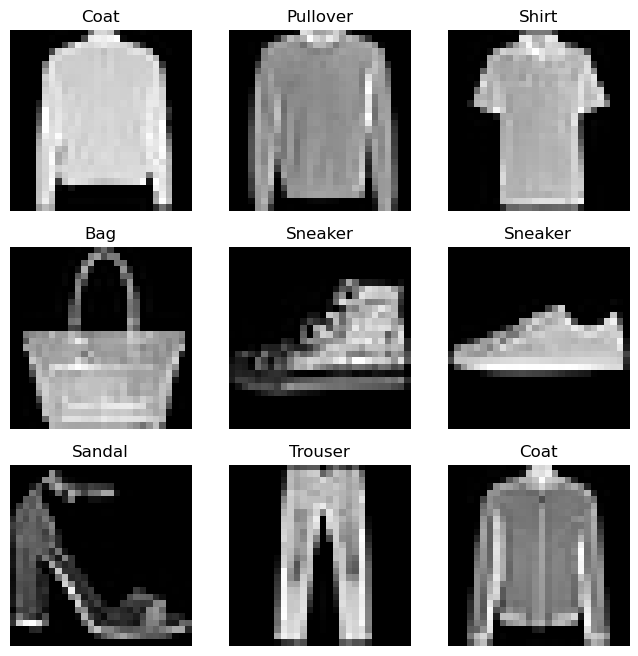

In [3]:
# 데이터셋을 순회하고 시각화 하기
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1, )).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [5]:
# 파일에서 사용자 정의 데이터셋 만들기
"""
사용자 정의 Dataset 클래스는 반드시 3개 함수를 구현해야 한다
__init__, __len__, __getitem__

아래 구현을 살펴보면 FashionMNIST 이미지들을 img_dir 디렉토리에 저장되고, 정답은 annotations_file CSV파일에 별도로 저장된다
"""

import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        """ init 함수

        Dataset 객체가 생성될 때 한번만 실행 됨
        이미지와 주석 파일(annotation_file)잉 포함된 디렉토리와 두가지의 변형을 초기화 한다

        """
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        """ len 함수

        데이터셋의 샘플 개수를 반환한다

        """
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        """ getitem 함수

        주어진 인덱스(idx)에 해당하는 샘플을 데이터셋에서 불러오고 반환한다
        인덱스를 기반으로, 디스크에서 이미지의 위치를 식별하고 read_image를 사용하여 이미지를 텐서로 변환, 
        self.image_labels의 csv 데이터로부터 정답을 가져오고, 변형 함수를 호출한 뒤 텐서 이미지와 라벨을 Python dict형으로 반환

        """
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### DataLoader로 학습용 데이터 준비하기
Dataset : 데이터셋의 특징을 가져오고 하나의 샘플에 정답을 지정하는 일을 한번에 수행한다

모델을 학습할 때, 일반적으로 샘플들을 미니배치로 전달하고 매 epoch마다 데이터를 다시 섞어서 overfitting을 막는다

### DataLoader를 통해 순회하기
DataLoader에는 데이터셋을 불러온 후 이를 순회할 수 있다
train_features, train_labels의 묶음(batch)을 반환한다

In [6]:
# DataLoader로 학습용 데이터 준비하기
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


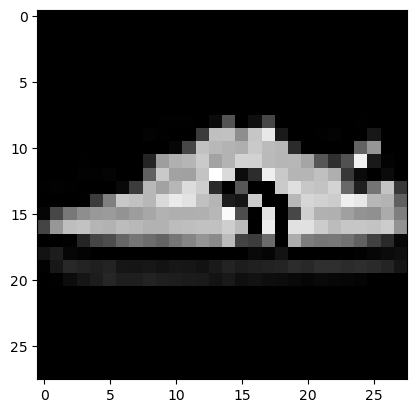

Label: 7


In [8]:
# DataLoader를 통해 순회하기 

# 이미지와 정답(label)을 표시.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")